# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Faiza Yusuf

<br>

## Please show and display ALL your calculations and results.


In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
%load_ext nb_black

<IPython.core.display.Javascript object>

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

## DATA CLEANING

In [2]:
# load the data
data = pd.read_csv("data/Ulta Skincare Reviews.csv")
dff = data.copy()
dff.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


<IPython.core.display.Javascript object>

### I will only be working with review_text and Product, i will ectract the two columns

In [3]:
df = dff[["Review_Text", "Product"]].copy()

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Review_Text,Product
0,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,Multi-Vitamin Thermafoliant
1,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,Multi-Vitamin Thermafoliant
2,Enjoy this product so much ! I look forward to using it - really feels great.,Multi-Vitamin Thermafoliant
3,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,Multi-Vitamin Thermafoliant
4,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",Multi-Vitamin Thermafoliant


<IPython.core.display.Javascript object>

In [5]:
df.shape

(4150, 2)

<IPython.core.display.Javascript object>

In [6]:
# chek for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  4147 non-null   object
 1   Product      4150 non-null   object
dtypes: object(2)
memory usage: 65.0+ KB


<IPython.core.display.Javascript object>

In [7]:
# check for null values
df.isna().sum()

Review_Text    3
Product        0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# i will drop the null value
df.dropna(inplace=True)
df.isna().sum()

Review_Text    0
Product        0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# importing NLP library
import spacy

nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words
type(stopwords)

set

<IPython.core.display.Javascript object>

In [10]:
def preprocess(*, text: str)-> str:
    """
    This function convert doc to lower case, remove stopwards, remove special characters
    and the lemmertize
    """
    
    #convert to lower case
    txt = text.lower()
    
    stopwords = nlp.Defaults.stop_words
    
    # remove stopwords
    doc = nlp(txt)
    no_stopward = ""
    for token in doc:
        if token.text not in stopwords:
            no_stopward = no_stopward + " " + str(token.text)
            
    # remove special characters
    pattern = r"[^\w\s]"
    replace = ""
    no_special_char = re.sub(pattern=pattern, repl=replace, string=no_stopward)
    
    # lemmertize
    doc1 = nlp(no_special_char)
    new_doc = ""
    for token in doc1:
        new_doc = new_doc + " " + token.lemma_
        
    return new_doc


<IPython.core.display.Javascript object>

### Feature Engineering
* convert review-text column to lower case
* remove stopwords in the review-text column
* remove special characters in the review-text column
* lemmertize in the review-text column
* create a new column for sentiment analysis score
* create a new column that categorize the sentiment to three categories
* create a new column that categorize the sentiment to two categories
* create a column that specify buyer with skincare issue or not 


In [11]:
# applyint the preprocessing to review text column and assigning to new column
df["cleaned"] = df["Review_Text"].apply(lambda x: preprocess(text=x))

<IPython.core.display.Javascript object>

In [12]:
# importing the spacytextblob library for sentiment analysis
from spacytextblob.spacytextblob import SpacyTextBlob

# adding it to the nlp pipeline
nlp.add_pipe("spacytextblob")

<IPython.core.display.Javascript object>

In [13]:
# creating a new column that sentiment analysis score

df["Sentiment"] = df["cleaned"].apply(lambda x: round(nlp(x)._.polarity, 2))

<IPython.core.display.Javascript object>

In [14]:
# creating a new column that categorize the sentiment to three categories
df["Rating(three)"] = df["Sentiment"].apply(
    lambda x: "negative" if x < 0 else ("nuetral" if x == 0 else "positive")
)

<IPython.core.display.Javascript object>

In [15]:
# creating a new column that categorize the sentiment to two categorie
df["Rating"] = df["Sentiment"].apply(lambda x: 1 if x >= 0 else 0)

<IPython.core.display.Javascript object>

In [16]:
# Define a list of some keywords for skincare issue
pattern = r"(skin|acne|wrinkle|dry|oil|dark|spot|red|age|aging|sag'|eye|bag|oily|\
             razor|bump|cold|sore|blist|hive|actinic|keratosis|rough|peel|peeling|eczema|rash|\
             chickenpox|measles|ringworm|rash|melasma|pore|measle|warts|cracked|crack|redness|sunburn|scrub|pimple\
             |dryness|enzyme|scar|hard)"
    
# creating a column that categorize skincare issue    
df["skincare_issue"] = np.where(
    df["cleaned"].str.strip().str.contains(pat=pattern, flags=re.I),
    "yes",
    "not really",
)


C:\Users\Hp\AppData\Local\Temp\ipykernel_6480\3052471275.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["cleaned"].str.strip().str.contains(pat=pattern, flags=re.I),


<IPython.core.display.Javascript object>

In [17]:
# get the new dtataframe
df.head()

,Review_Text,Product,cleaned,Sentiment,Rating(three),Rating,skincare_issue
0,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,Multi-Vitamin Thermafoliant,love face shower heat give light scrub nicely,0.50,positive,1,yes
1,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,Multi-Vitamin Thermafoliant,well daily microfoliant obsess skin smooth,0.20,positive,1,yes
2,Enjoy this product so much ! I look forward to using it - really feels great.,Multi-Vitamin Thermafoliant,enjoy product look forward feel great,0.60,positive,1,not really
3,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,Multi-Vitamin Thermafoliant,try like love apply face little shot warm feel good scrub gritty effect encounter positive one,0.31,positive,1,yes
4,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",Multi-Vitamin Thermafoliant,exfoliate nicely give smooth skin irritation reaction skin highly recommend buy,0.39,positive,1,yes


<IPython.core.display.Javascript object>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


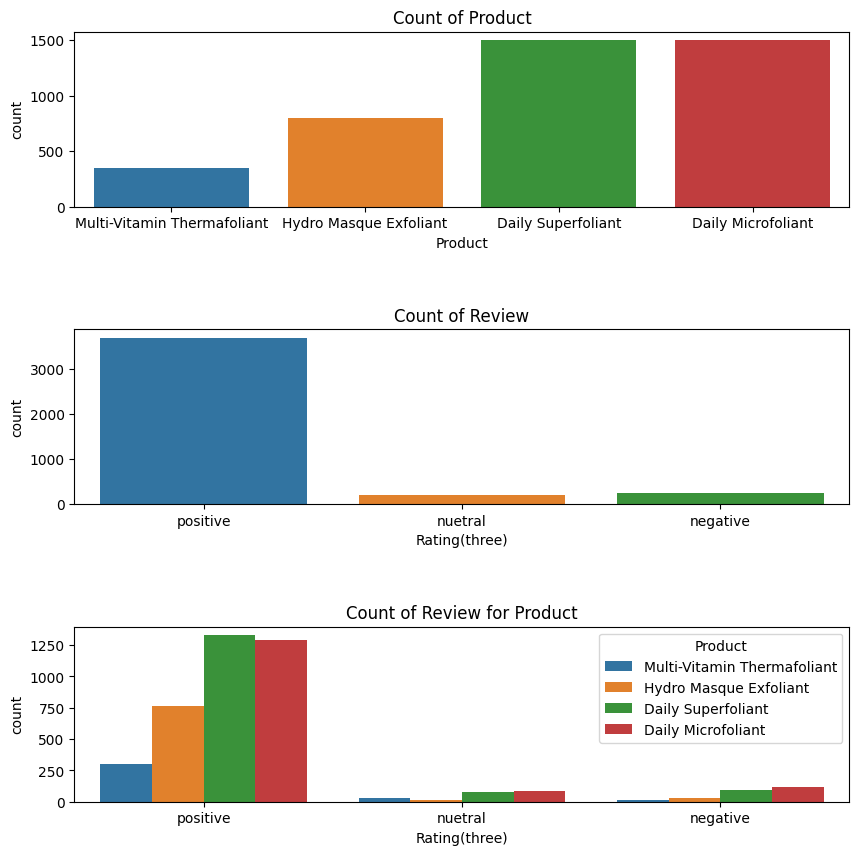

<IPython.core.display.Javascript object>

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

sns.countplot(data=df, x="Product", ax=ax[0])
ax[0].set_title("Count of Product")

sns.countplot(data=df, x="Rating(three)", ax=ax[1])
ax[1].set_title("Count of Review")

sns.countplot(data=df, x="Rating(three)", hue="Product", ax=ax[2])
ax[2].set_title("Count of Review for Product")

plt.subplots_adjust(hspace=0.7)
plt.show()

* almost all the review are positive review
* Daily Superfoliant and Daily Microfoliant have the heighest review and also have the heighest positive review
* Daily Superfoliant has the heighest positive review while Daily Microfoliant has thee highest negative review
* this shows that Daily Superfoliant and Daily Microfoliant are good product for skincare 

In [19]:
skincare_issue = df["skincare_issue"].value_counts()
skincare_issue

skincare_issue
yes           3309
not really     838
Name: count, dtype: int64

<IPython.core.display.Javascript object>

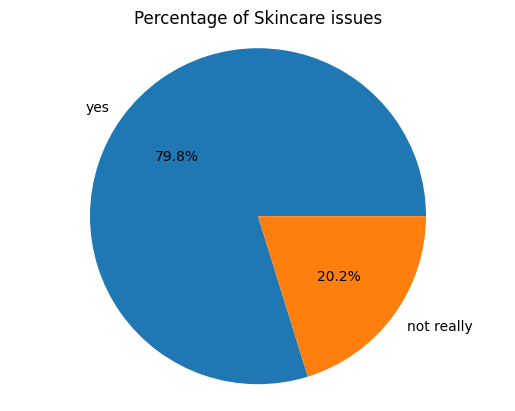

<IPython.core.display.Javascript object>

In [20]:
plt.pie(skincare_issue, labels=skincare_issue.index, autopct="%0.1f%%")
plt.axis("equal")
plt.title("Percentage of Skincare issues")
plt.show()

* using some keywords, it was found that about 79 percent of buyers have skincare issues. if i add more keywords the number might increase

In [21]:
from collections import Counter

words = dict(
    Counter(
        " ".join(df[df["Rating(three)"] == "positive"]["cleaned"]).split()
    ).most_common(100)
)
words

{'skin': 5096,
 'product': 2787,
 'feel': 2072,
 'use': 1689,
 'love': 1438,
 'face': 1237,
 'leave': 1111,
 'smooth': 1055,
 'soft': 931,
 'great': 929,
 'like': 777,
 'time': 754,
 'clean': 751,
 'look': 711,
 'dry': 676,
 'exfoliate': 611,
 'dermalogica': 610,
 'try': 607,
 'gentle': 595,
 'work': 587,
 'daily': 578,
 'exfoliant': 576,
 'recommend': 546,
 'mask': 545,
 'cleanser': 535,
 'good': 503,
 'make': 500,
 'week': 472,
 'day': 451,
 'sensitive': 437,
 'definitely': 425,
 'little': 422,
 'powder': 357,
 'need': 356,
 'texture': 353,
 'get': 348,
 'smell': 345,
 'notice': 341,
 'minute': 332,
 'receive': 322,
 '5': 319,
 'super': 293,
 'amazing': 293,
 'help': 287,
 'go': 280,
 'makeup': 266,
 'water': 258,
 'acne': 254,
 'rub': 252,
 'take': 251,
 'buy': 245,
 'pore': 239,
 'well': 238,
 'microfoliant': 236,
 'fresh': 236,
 'routine': 230,
 'way': 225,
 'long': 222,
 'result': 220,
 'year': 213,
 'difference': 213,
 'scrub': 212,
 'give': 211,
 'perfect': 209,
 'small': 206,


<IPython.core.display.Javascript object>

* From the review, the products makes the skin smooth, soft, glow, clean and also brighten the skin

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

In [22]:
# importing the wordcloud library
from wordcloud import WordCloud

<IPython.core.display.Javascript object>

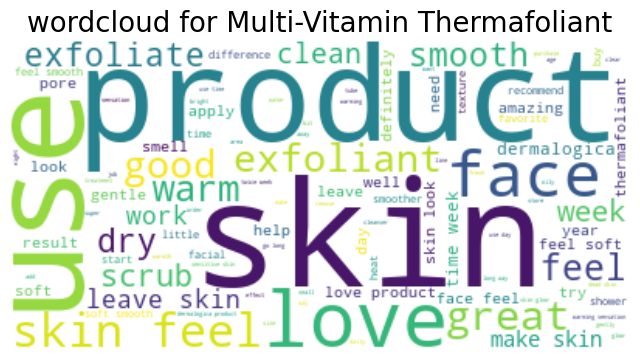

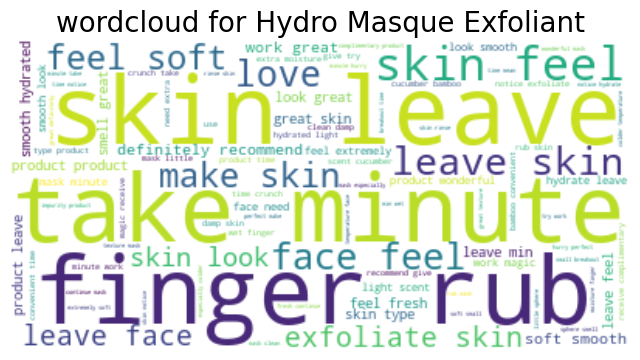

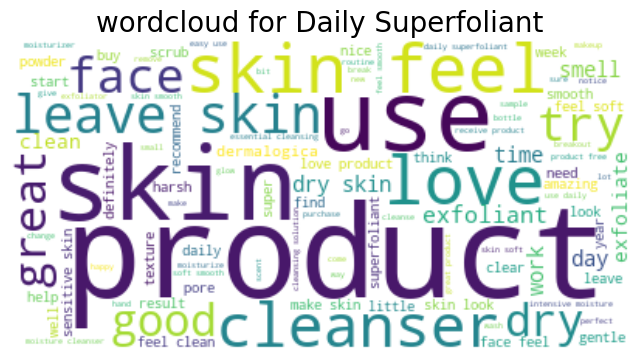

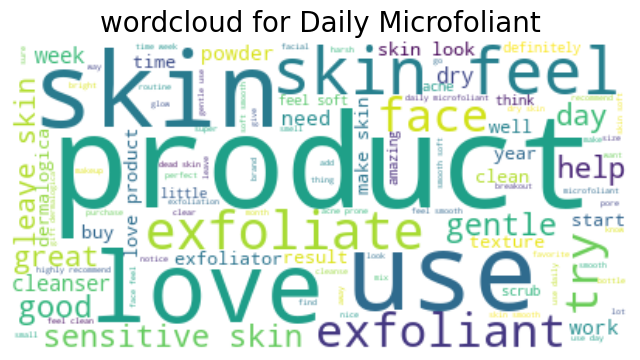

<IPython.core.display.Javascript object>

In [23]:
product = ['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant']

for i in product:
    x = " ".join(df[df["Product"] == i]["cleaned"])
    wordcloud = WordCloud(max_words=100, background_color="white", colormap="viridis")
    wordcloud.generate(x)
    
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"wordcloud for {i}", size=20)
    plt.subplots_adjust(hspace=0.5)
    plt.axis("off")
    plt.show()


### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

<IPython.core.display.Javascript object>

#### checking if the target variable is inbalance

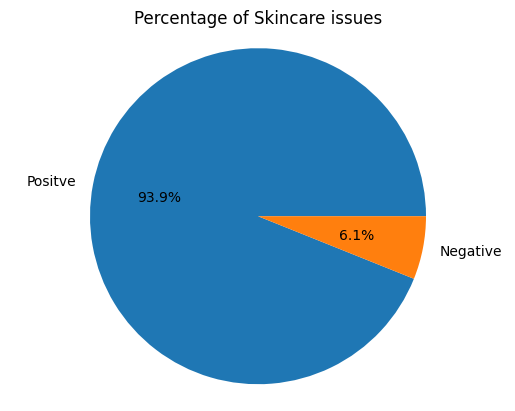

<IPython.core.display.Javascript object>

In [25]:
target = df["Rating"].value_counts()
LABEL = ["Positve", "Negative"]
plt.pie(target, labels=LABEL, autopct="%0.1f%%")
plt.axis("equal")
plt.title("Percentage of Skincare issues")
plt.show()

* Since the class is inbalance i will use roc-auc for validation

In [26]:
# split the data into two

RANDOM_STATE = 123
TEST_SIZE = 0.2
X = df["cleaned"]
y = df["Rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE, test_size=TEST_SIZE
)

X_train.shape, X_test.shape

((3317,), (830,))

<IPython.core.display.Javascript object>

In [27]:
# model using MultinomialNB

nb_pipe = Pipeline(
    steps=[
        ("vectorizer_tfidf", TfidfVectorizer()),
        ("NaiveBayes", MultinomialNB()),
    ]
)
# fit with X_train and y_train
nb_pipe.fit(X_train, y_train)

# get the predictions for X_test and store it in y_pred
y_pred_1 = nb_pipe.predict(X_test)


y_proba_1 = nb_pipe.predict_proba(X_test)[:, 1]
auc_score_1 = roc_auc_score(y_true=y_test, y_score=y_proba_1)
auc_score_1

0.807907508732882

<IPython.core.display.Javascript object>

In [28]:
# model using logistic regression

logit_pipe = Pipeline(
    steps=[
        ("vectorizer_tfidf", TfidfVectorizer()),
        ("NaiveBayes", LogisticRegression()),
    ]
)
# fit with X_train and y_train
logit_pipe.fit(X_train, y_train)

# get the predictions for X_test and store it in y_pred
y_pred_2 = logit_pipe.predict(X_test)


y_proba_2 = logit_pipe.predict_proba(X_test)[:, 1]
auc_score_2 = roc_auc_score(y_true=y_test, y_score=y_proba_2)
auc_score_2

0.9332591424773564

<IPython.core.display.Javascript object>

In [29]:
# model using random forest

RandomF_pipe = Pipeline(
    steps=[
        ("vectorizer_tfidf", TfidfVectorizer()),
        ("NaiveBayes", RandomForestClassifier()),
    ]
)
# fit with X_train and y_train
RandomF_pipe.fit(X_train, y_train)

# get the predictions for X_test and store it in y_pred
y_pred_3 = RandomF_pipe.predict(X_test)


y_proba_3 = RandomF_pipe.predict_proba(X_test)[:, 1]
auc_score_3 = roc_auc_score(y_true=y_test, y_score=y_proba_3)
auc_score_3

0.8574144486692015

<IPython.core.display.Javascript object>

In [30]:
from sklearn.svm import SVC

SVM_pipe = Pipeline(
    steps=[
        ("vectorizer_tfidf", TfidfVectorizer()),
        ("NaiveBayes", SVC(probability=True)),
    ]
)
# fit with X_train and y_train
SVM_pipe.fit(X_train, y_train)

# get the predictions for X_test and store it in y_pred
y_pred_4 = SVM_pipe.predict(X_test)


y_proba_4 = SVM_pipe.predict_proba(X_test)[:, 1]
auc_score_4 = roc_auc_score(y_true=y_test, y_score=y_proba_4)
auc_score_4

0.9244489783300875

<IPython.core.display.Javascript object>

###  Conclution
* Even though Naive bayes is mostly used for text classification, here logistic regression is performs better